<a href="https://colab.research.google.com/github/syedabasmah/machine_learning_assignments/blob/main/assignment02/Machine_Learning_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment Instructions:**

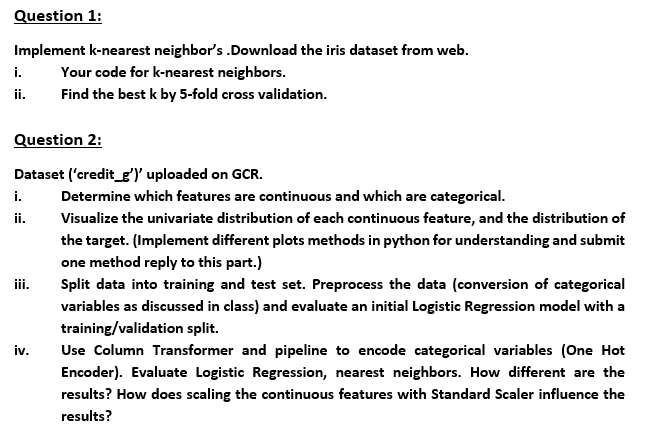

# **Question 1 Part (I,II)**

**Import the libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the file:**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv', index_col='Id')


**Data analysis:**

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

**What is the distribution of data?**


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

We see that we have an equal distribution of the target variable which is good!

**Are there any missing values?**

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Separate data into X and Y:**

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:, 4]

**Split the data into train and test:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state =1)

**Data standardization:**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Implementation of kNN Classifier:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

**Make prediction using the model:**

In [ ]:
Y_predict = classifier.predict(X_test)

**Output visualization:**

In [ ]:
output_prediction = pd.DataFrame(data=[Y_test.values,Y_predict],index=['Y_test (actual)','Y_predict'])


In [ ]:
output_prediction.transpose()

,Y_test (actual),Y_predict
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [ ]:
output_prediction.iloc[0,:].value_counts()

Iris-versicolor    13
Iris-setosa        11
Iris-virginica      6
Name: Y_test (actual), dtype: int64

**Evaluation of the model:**

**1. Accuracy score:**

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predict))

0.9666666666666667


**2. Classification report:**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



**3. Confusion matrix:**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_predict)
cm1 = pd.DataFrame(data=cm, index=['SETOSA','VERSICOLR','VIRGINICA'],columns=['SETOSA','VERSICOLR','VIRGINICA'])
cm1

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,11,0,0
VERSICOLR,0,12,1
VIRGINICA,0,0,6


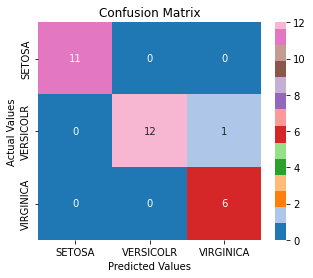

In [ ]:
# Another way of plotting the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(5,4))
cmap = "tab20"
center = 9
sns.heatmap(cm_df, annot=True, cmap=cmap, center=center)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# **Find the best k by using 5-fold cross-validation:**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, Y, cv=5, scoring= 'accuracy')
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [ ]:
# Taking average of the five accuracies to estimate the overall accuracy of the model
scores.mean()

0.9733333333333334

**Choose different neighbors to see which k is the best k:**

Our optimal/best value of k is 6 with an accuracy of 0.9800000000000001


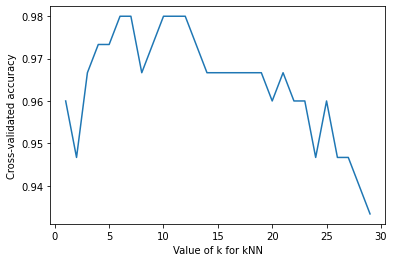

In [ ]:
# Choose k between 1,30
k_range = range(1,30)
k_scores = []

# Use iteration to calculate different values of k using kNN model, then return the average accuracy based on the cross validation
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(classifier, X, Y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
optimal_k = k_range[k_scores.index(max(k_scores))]
print("Our optimal/best value of k is {}".format(optimal_k), "with an accuracy of {}".format(max(k_scores)))
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for kNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

# **Question 2 Part (I,II)**

**Import the libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the file:**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset_31_credit-g.csv')


**Data analysis:**

In [ ]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [ ]:
data.shape

(1000, 21)

**Are there any missing values?**

In [ ]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

**Checking for categorical features:**

In [ ]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
print('Number of categorical features are : ', len(categorical_features))
categorical_features

Number of categorical features are :  14


['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

**Checking for continuous features:**

In [ ]:
continuous_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of continuous features are : ', len(continuous_features))
data[continuous_features].head()

Number of continuous features are :  7


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


**Visualize the univariate distribution of each continuous feature and the distribution of the target:**

The term univariate analysis refers to the analysis of one variable at a time.

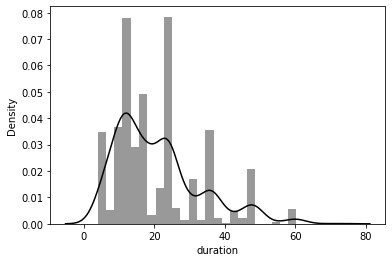

In [ ]:
sns.distplot(data.duration, color='black')

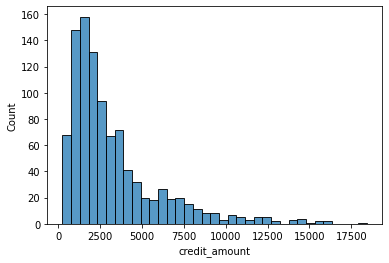

In [ ]:
sns.histplot(data['credit_amount'])

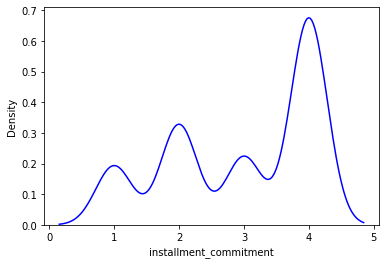

In [ ]:
sns.kdeplot(data.installment_commitment, color='b')

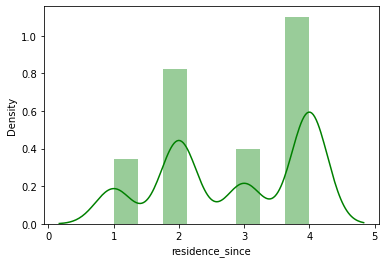

In [ ]:
sns.distplot(data.residence_since, color='g')

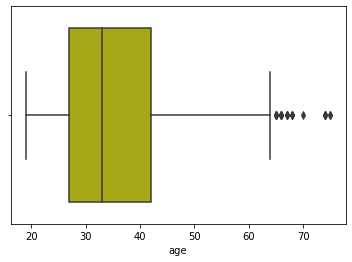

In [ ]:
sns.boxplot(data.age, color='y')

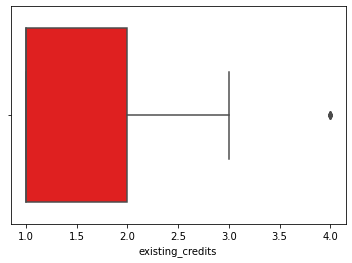

In [ ]:
sns.boxplot(data.existing_credits	, color='r')

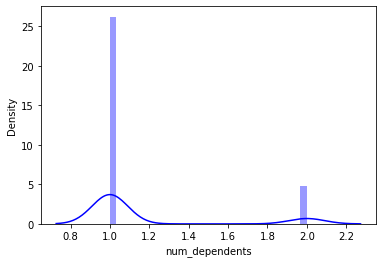

In [ ]:
sns.distplot(data.num_dependents, color='b')

**Distribution of target (class):**

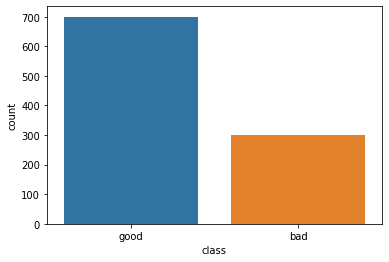

In [ ]:
sns.countplot(data['class'])

In [ ]:
data['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

# **Part (III)**

**Convert categorical data to numeric data:**

In [ ]:
print('Number of categorical features are : ', len(categorical_features))

Number of categorical features are :  14


In [ ]:
categorical_features

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is checking_status and number of categories are 4
The feature is credit_history and number of categories are 5
The feature is purpose and number of categories are 10
The feature is savings_status and number of categories are 5
The feature is employment and number of categories are 5
The feature is personal_status and number of categories are 4
The feature is other_parties and number of categories are 3
The feature is property_magnitude and number of categories are 4
The feature is other_payment_plans and number of categories are 3
The feature is housing and number of categories are 3
The feature is job and number of categories are 4
The feature is own_telephone and number of categories are 2
The feature is foreign_worker and number of categories are 2
The feature is class and number of categories are 2


**Applying label encoding to the target feature, ordinal encoding to the features with two categories and one hot encoding to the remaining categorical features:**

In [ ]:
target_feature = ['class']
features_with_twocat = [
 'own_telephone',
 'foreign_worker']
features_with_manycat = ['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job']

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le = LabelEncoder()
oe = OrdinalEncoder()
data['class_LabEnc'] = le.fit_transform(data['class'])
data['own_telephone'] = le.fit_transform(data['own_telephone'])
data['foreign_worker'] = le.fit_transform(data['foreign_worker'])
data.drop('class', axis=1, inplace=True)

In [ ]:
data.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class_LabEnc
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,1,1,1
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,0,1,0
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,0,1,1


In [ ]:
one_hot_encoded_data = pd.get_dummies(data[features_with_manycat])

In [ ]:
pd.set_option('display.max_columns', None)
one_hot_encoded_data.head()

,checking_status_'0<=X<200',checking_status_'<0',checking_status_'>=200',checking_status_'no checking',credit_history_'all paid',credit_history_'critical/other existing credit',credit_history_'delayed previously',credit_history_'existing paid',credit_history_'no credits/all paid',purpose_'domestic appliance',purpose_'new car',purpose_'used car',purpose_business,purpose_education,purpose_furniture/equipment,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,savings_status_'100<=X<500',savings_status_'500<=X<1000',savings_status_'<100',savings_status_'>=1000',savings_status_'no known savings',employment_'1<=X<4',employment_'4<=X<7',employment_'<1',employment_'>=7',employment_unemployed,personal_status_'female div/dep/mar',personal_status_'male div/sep',personal_status_'male mar/wid',personal_status_'male single',other_parties_'co applicant',other_parties_guarantor,other_parties_none,property_magnitude_'life insurance',property_magnitude_'no known property',property_magnitude_'real estate',property_magnitude_car,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_'for free',housing_own,housing_rent,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1


In [ ]:
one_hot_encoded_data.shape

(1000, 50)

In [ ]:
concatenated_data = pd.concat([one_hot_encoded_data,data],axis=1)

In [ ]:
concatenated_data.shape

(1000, 71)

**Drop repeated features:**

In [ ]:
concatenated_data.drop(features_with_manycat, axis=1, inplace=True)

In [ ]:
concatenated_data.shape

(1000, 60)

In [ ]:
concatenated_data.head()

,checking_status_'0<=X<200',checking_status_'<0',checking_status_'>=200',checking_status_'no checking',credit_history_'all paid',credit_history_'critical/other existing credit',credit_history_'delayed previously',credit_history_'existing paid',credit_history_'no credits/all paid',purpose_'domestic appliance',purpose_'new car',purpose_'used car',purpose_business,purpose_education,purpose_furniture/equipment,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,savings_status_'100<=X<500',savings_status_'500<=X<1000',savings_status_'<100',savings_status_'>=1000',savings_status_'no known savings',employment_'1<=X<4',employment_'4<=X<7',employment_'<1',employment_'>=7',employment_unemployed,personal_status_'female div/dep/mar',personal_status_'male div/sep',personal_status_'male mar/wid',personal_status_'male single',other_parties_'co applicant',other_parties_guarantor,other_parties_none,property_magnitude_'life insurance',property_magnitude_'no known property',property_magnitude_'real estate',property_magnitude_car,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_'for free',housing_own,housing_rent,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,class_LabEnc
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,6,1169,4,4,67,2,1,1,1,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,48,5951,2,2,22,1,1,0,1,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,12,2096,2,3,49,1,2,0,1,1
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,42,7882,2,4,45,1,2,0,1,1
4,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,24,4870,3,4,53,2,2,0,1,0


**Separate data into X and Y:**

In [ ]:
concatenated_data.shape

(1000, 60)

In [ ]:
X = concatenated_data.iloc[:, 0:59]
Y = concatenated_data.iloc[:, 59:]

**Split the data into train and test:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state =1)

**Data standardization:**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Perform Logistic regression model:**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

**Make prediction using the model:**

In [ ]:
Y_predict = log_reg.predict(X_test)

**Evaluation of the model:**

**1. Accuracy score:**

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_predict))

0.75


In [ ]:
# Checking accuracy using 10 fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X, Y, cv=10, scoring= 'accuracy')
scores

array([0.74, 0.72, 0.72, 0.79, 0.76, 0.81, 0.69, 0.84, 0.73, 0.75])

In [ ]:
scores.mean()

0.7549999999999999

**2. Classification report:**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.61      0.42      0.50        59
           1       0.79      0.89      0.83       141

    accuracy                           0.75       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.73      0.75      0.73       200



**3. Confusion matrix:**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_predict)
cm1 = pd.DataFrame(data=cm, index=['YES','NO'],columns=['YES','NO'])
cm1

,YES,NO
YES,25,34
NO,16,125


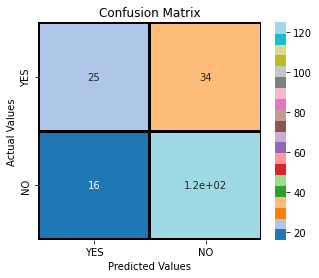

In [ ]:
# Another way of plotting the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['YES','NO'], 
                     columns = ['YES','NO'])
plt.figure(figsize=(5,4))
linewidths = 2
linecolor = "black"
cmap = "tab20"
sns.heatmap(cm_df, annot=True,  linewidths=linewidths, linecolor=linecolor,cmap=cmap)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# **Part (IV)**

**Use column transformer and pipeline to encode categorical variables (one hot encoding) and apply standard scaler scaling on continuous variables:**

**Import the libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the file:**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_31_credit-g.csv')


**Train-test split:**

In [ ]:
X = df.drop(columns=['class'])
Y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state =1)

**Create transformers:**

In [ ]:
preprocessing = make_column_transformer(
(OrdinalEncoder(),['own_telephone','foreign_worker']),
(OneHotEncoder(), ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job']),
(StandardScaler(),['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']), 
remainder='passthrough')

In [ ]:
from sklearn import set_config
set_config(display="diagram")
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['own_telephone', 'foreign_worker']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['checking_status', 'credit_history',
                                  'purpose', 'savings_status', 'employment',
                                  'personal_status', 'other_parties',
                                  'property_magnitude', 'other_payment_plans',
                                  'housing', 'job']),
                                ('standardscaler', StandardScaler(),
                                 ['duration', 'credit_amount',
                                  'installment_commitment', 'residence_since',
                                  'age', 'existing_credits',
                                  'num_dependents'])])

In [ ]:
log_reg = LogisticRegression()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

**Create pipelines:**

**1. Implementation of Logistic Regression Model:**

In [ ]:
pipe1 = make_pipeline(preprocessing, log_reg)

In [ ]:
# fit the model
pipe1.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['own_telephone',
                                                   'foreign_worker']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['checking_status',
                                                   'credit_history', 'purpose',
                                                   'savings_status',
                                                   'employment',
                                                   'personal_status',
                                                   'other_parties',
                                                   'property_magnitude',
                                                   'other_payment_plans',
                                                   'housing', 'job']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents'])])),
                ('logisticregression', LogisticRegression())])

In [ ]:
prediction1 = pipe1.predict(X_test)

**Evaluation of the model:**

**1. Accuracy score:**

In [ ]:
print("Logistic regression score on test datae: %f" % pipe1.score(X_test, Y_test))
print("Logistic regression score on train data: %f" % pipe1.score(X_train, Y_train))

Logistic regression score on test datae: 0.760000
Logistic regression score on train data: 0.792500


**2. Classification report:**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction1))

              precision    recall  f1-score   support

         bad       0.64      0.42      0.51        59
        good       0.79      0.90      0.84       141

    accuracy                           0.76       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.75      0.76      0.74       200



**3. Confusion matrix:**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test,prediction1)
cm

array([[ 25,  34],
       [ 14, 127]])

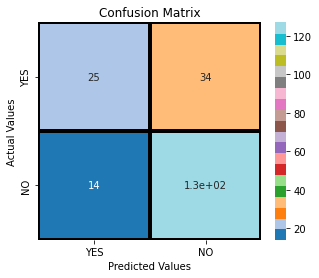

In [ ]:
# Another way of plotting the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['YES','NO'], 
                     columns = ['YES','NO'])
plt.figure(figsize=(5,4))
cmap = "tab20"
linewidths = 3
linecolor = "black"
sns.heatmap(cm_df, annot=True, cmap=cmap, linewidths=linewidths, linecolor=linecolor)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

**2. Implementation of kNN Model with 5 nearest neighbours:**

In [ ]:
pipe2 = make_pipeline(preprocessing, knn)

In [ ]:
# fit the model
pipe2.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['own_telephone',
                                                   'foreign_worker']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['checking_status',
                                                   'credit_history', 'purpose',
                                                   'savings_status',
                                                   'employment',
                                                   'personal_status',
                                                   'other_parties',
                                                   'property_magnitude',
                                                   'other_payment_plans',
                                                   'housing', 'job']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
prediction2 = pipe2.predict(X_test)

**Evaluation of the model:**

**1. Accuracy score:**

In [ ]:
print("kNN score on test datae: %f" % pipe2.score(X_test, Y_test))
print("kNN score on train data: %f" % pipe2.score(X_train, Y_train))

kNN score on test datae: 0.720000
kNN score on train data: 0.830000


**2. Classification report:**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction2))

              precision    recall  f1-score   support

         bad       0.54      0.34      0.42        59
        good       0.76      0.88      0.82       141

    accuracy                           0.72       200
   macro avg       0.65      0.61      0.62       200
weighted avg       0.70      0.72      0.70       200



**3. Confusion matrix:**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test,prediction2)
cm

array([[ 20,  39],
       [ 17, 124]])

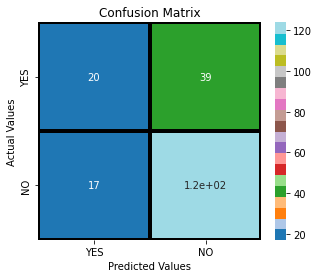

In [ ]:
# Another way of plotting the confusion matrix
cm_df = pd.DataFrame(cm,
                     index = ['YES','NO'], 
                     columns = ['YES','NO'])
plt.figure(figsize=(5,4))
cmap = "tab20"
linewidths = 3
linecolor = "black"
sns.heatmap(cm_df, annot=True, cmap=cmap, linewidths=linewidths, linecolor=linecolor)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# **Check the accuracy of the models using 10-fold cross-validation:**

In [ ]:
#Logistic regression 
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(pipe1, X, Y, cv=10, scoring= 'accuracy')
scores1

array([0.82, 0.69, 0.73, 0.79, 0.75, 0.77, 0.65, 0.81, 0.74, 0.77])

In [ ]:
scores1.mean()

0.752

In [ ]:
#kNN classifier
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(pipe2, X, Y, cv=10, scoring= 'accuracy')
scores2

array([0.73, 0.68, 0.72, 0.7 , 0.71, 0.71, 0.72, 0.8 , 0.78, 0.72])

In [ ]:
scores2.mean()

0.727